# Titanic - Machine Learning from Disaster
![Titanic Image](https://miro.medium.com/max/1400/1*TD1TlRu96o_gDrM-NiBwpQ.jpeg)
## Kaggle competition - Luciano Guerra
[Kaggle](https://www.kaggle.com/c/titanic/data)

### Overview 

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

### Data Dictionary 

Variable | Definition | Key
- | - | -
survival | Survival | 0 = No, 1 = Yes
pclass |Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd
sex	| Sex	| |
Age	|Age in years | |	
sibsp	| # of siblings / spouses aboard the Titanic ||
parch | # of parents / children aboard the Titanic	||
ticket | Ticket number	||
fare | Passenger fare	||
cabin | Cabin number	||
embarked | Port of Embarkation	| C = Cherbourg, Q = Queenstown, S = Southampton

### Variable Notes

__pclass__: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

__age__: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

__sibsp__: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

__parch__: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Start ML project
### Predefined Steps as Hands On Machine Learning _(Auréline Géron)_
1. Frame the Problem and Look at the Big Picture
2. Get the data
3. Explore the data insights
4. Prepare the data
5. Explore many different models
6. Fine-Tune your model and combine them into a great solution
7. Present your solution
8. Launch, monitor and maintain your system

## 1. Frame the Problem
This project takes part in a series of projects to improve my ML skills. This is the first project made and it should be based in a popular Kaggle competition. The target should be to obtain a good result in the Kaggle competition.

This good result should be if the accuracy in the test data is higher than 0.98.

The solution of this project should be a .csv file with the correct structure to be submited in the Kaggle form.

## 2. Get the Data

Data is provided by Kaggle to perform the competition

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/titanic.zip
./data/train.csv
./data/test.csv
./data/gender_submission.csv


## 3. Explore the data

In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Train data include labels, so we have to divide between features and labels

In [6]:
train_feat = train.drop(['Survived'], axis=1)
train_lab = pd.concat([train.PassengerId, train.Survived], 
                      axis=1,
                      keys=[train.PassengerId.name, train.Survived.name])
train_feat.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_lab.head()

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0


In [8]:
if train_feat.PassengerId.is_unique:
    train_feat.set_index('PassengerId', inplace=True)
    train_lab.set_index('PassengerId', inplace=True)
    print("Index updated")

Index updated


In [9]:
train_feat.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train_lab.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [11]:
train_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


In a first view we can see there are 891 records. But not all features are completed. 
- Age: we lost multiple records of Age. Too much information to loose. So we must decide which strategy could be the best to solve this problem. Options: 
    - Deleting Rows with missing values.
    - Impute missing values for continous variable.
    - Other imputation methods.
    - Using Algorithms that support missing values.
    - Prediction of missing values.
    - Imputation using Deep Learning Library - Datawig
- Cabin: We just have 204 records. Not enough to consider the info in this feature good for training. So we delete this feature.The rows which are having one or more columns values as null can also be dropped.
- Embarked: We just lost 2 records. So we can asume to lost this information, deleting this two records.

>We shall use "Explore the data" to modify the data and fullfill lost records and delete not useful information. Otherwise, we shall call "Prepare the data", to modify the data to adapt to train the model.

Check the 'Embarked' records lost

In [12]:
train_feat[train_feat.Embarked.isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


We can see both were in the same cabin. We can see, as well, the Ticket is the same number and the Fare is identical. 
I shall try to understand if we can see any relation with similar records.

In [13]:
train_feat.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
train_feat[55:70]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
56,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
57,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
58,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C
59,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S
60,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
61,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
63,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
64,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S


In [15]:
train_feat[825:835]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
826,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q
827,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
828,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
829,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,B28,NaN
831,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.00,1,0,2659,14.4542,NaN,C
832,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
833,3,"Saad, Mr. Amin",male,NaN,0,0,2671,7.2292,NaN,C
834,3,"Augustsson, Mr. Albert",male,23.00,0,0,347468,7.8542,NaN,S


According with this info we shall try to check the average for the Fare at each different Embarked group.

In [16]:
train_feat.groupby(by=train_feat.Embarked.name).Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,168.0,59.954144,83.912994,4.0125,13.69795,29.70,78.500025,512.3292
Q,77.0,13.276030,14.188047,6.7500,7.75000,7.75,15.500000,90.0000
S,644.0,27.079812,35.887993,0.0000,8.05000,13.00,27.900000,263.0000


According with this table, the C class have an average closer to the Fare value of our records of study.

Checking it visually

<AxesSubplot:title={'center':'Fare'}, xlabel='Embarked'>

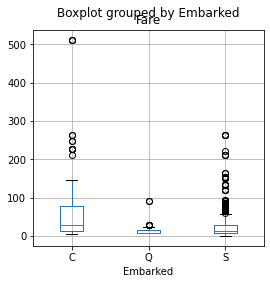

In [17]:
train_feat.boxplot(column='Fare', by='Embarked', figsize=(4,4))

This appears that the only option not to be an outlier should be to belong to the C class.

In [18]:
train_feat.groupby(by=train_feat.Embarked.name).median()

,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,
C,1.0,29.0,0.0,0.0,29.70
Q,3.0,27.0,0.0,0.0,7.75
S,3.0,28.0,0.0,0.0,13.00


So we assume C as the lost class

In [19]:
train_feat['Embarked'].replace({np.nan : 'C'}, inplace=True)

In [20]:
train_feat.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

#### Secondly we remove the 'Cabin' column

In [21]:
train_feat.drop(labels='Cabin',axis=1, inplace=True)

In [22]:
train_feat.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### At this point we have to decide what to do with lost data in Age

Impute missing values with Mean/Median:

In [23]:
train_feat.Age.mean(), train_feat.Age.median()

(29.69911764705882, 28.0)

In [24]:
train_feat.groupby(by=train_feat.Parch.name).Age.median()

Parch
0    30.0
1    23.0
2    16.5
3    24.0
4    42.5
5    39.0
6    43.0
Name: Age, dtype: float64

In [25]:
train_feat.groupby(by=train_feat.SibSp.name).Age.median()

SibSp
0    29.0
1    30.0
2    23.0
3     9.5
4     6.5
5    11.0
8     NaN
Name: Age, dtype: float64

In [26]:
Pclass_age = train_feat.groupby(by=train_feat.Pclass.name).Age.median().to_dict()
Pclass_age

{1: 37.0, 2: 29.0, 3: 24.0}

We can see a slightly difference with the age related to the Pclass in the boat. So we are going to change the NaN with the median (more robust than mean for outliers) of each Pclass.

In [27]:
train_temp1 = train_feat.loc[(train_feat.Pclass == 1) & (train_feat.Age.isna())].fillna(Pclass_age[1])
train_temp2 = train_feat.loc[(train_feat.Pclass == 2) & (train_feat.Age.isna())].fillna(Pclass_age[2])
train_temp3 = train_feat.loc[(train_feat.Pclass == 3) & (train_feat.Age.isna())].fillna(Pclass_age[3])

In [28]:
train_feat.loc[train_temp1.index, :] = train_temp1[:]
train_feat.loc[train_temp2.index, :] = train_temp2[:]
train_feat.loc[train_temp3.index, :] = train_temp3[:]

In [29]:
train_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 101.9+ KB


In [30]:
del train_temp1, train_temp2, train_temp3

## 4. Prepare the data

We shall make a firt overview of the actual data

In [31]:
train_feat.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


We have 3 categorical features: Pclass, Sex and Embarked. Name and Ticket seem to have no relevant information. So:
- We can remove Name and Ticket.
- We can transform Pclass, Sex and Embarked in different columns for each category.

In [32]:
train_feat.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [33]:
train_feat

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
887,2,male,27.0,0,0,13.0000,S
888,1,female,19.0,0,0,30.0000,S
889,3,female,24.0,1,2,23.4500,S


In [34]:
train_feat = pd.get_dummies(train_feat, columns=['Pclass', 'Sex', 'Embarked'])

In [35]:
train_feat

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
2,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
3,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
4,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
5,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,27.0,0,0,13.0000,0,1,0,0,1,0,0,1
888,19.0,0,0,30.0000,1,0,0,1,0,0,0,1
889,24.0,1,2,23.4500,0,0,1,1,0,0,0,1


In [36]:
train_feat.rename(columns={'Pclass_1' : 'C1', 'Pclass_2' : 'C2', 'Pclass_3' : 'C3',
                          'Sex_female': 'female', 'Sex_male' : 'male',
                          'Embarked_C': 'E_C', 'Embarked_Q' : 'E_Q', 'Embarked_S' : 'E_S'}, 
                 inplace=True)

In [37]:
train_feat

,Age,SibSp,Parch,Fare,C1,C2,C3,female,male,E_C,E_Q,E_S
PassengerId,,,,,,,,,,,,
1,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
2,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
3,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
4,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
5,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,27.0,0,0,13.0000,0,1,0,0,1,0,0,1
888,19.0,0,0,30.0000,1,0,0,1,0,0,0,1
889,24.0,1,2,23.4500,0,0,1,1,0,0,0,1


Now we are ready to visualze some data to see if any behaviour is detected.

In [38]:
train_lab

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
...,...
887,0
888,1
889,0


### Let's calculate some data and visualize to take conclusions
#### According with gender

In [39]:
wo_surv = train_lab[train_feat.female == 1]['Survived'].sum() / train_feat.female.sum()
ma_surv = train_lab[train_feat.female == 0]['Survived'].sum() / (train_feat.female.count() - train_feat.female.sum())
wo_surv, ma_surv

(0.7420382165605095, 0.18890814558058924)

We can see clearly women survived much more than men

#### According with class

In [40]:
C1_surv = train_lab[train_feat.C1 == 1]['Survived'].sum() / train_feat.C1.sum()
C2_surv = train_lab[train_feat.C2 == 1]['Survived'].sum() / train_feat.C2.sum()
C3_surv = train_lab[train_feat.C3 == 1]['Survived'].sum() / train_feat.C3.sum()
C1_surv, C2_surv, C3_surv

(0.6296296296296297, 0.47282608695652173, 0.24236252545824846)

In a first revision, we can see a clear behaviour. First class survive much more than third class. So this variables are relevant for the model. 

#### According with embark

In [41]:
EC_surv = train_lab[train_feat.E_C == 1]['Survived'].sum() / train_feat.E_C.sum()
EQ_surv = train_lab[train_feat.E_Q == 1]['Survived'].sum() / train_feat.E_Q.sum()
ES_surv = train_lab[train_feat.E_S == 1]['Survived'].sum() / train_feat.E_S.sum()
EC_surv, EQ_surv, ES_surv

(0.5588235294117647, 0.38961038961038963, 0.33695652173913043)

It seems that embarking on different cities takes into account in the survivor rate.

In [42]:
train_feat.corr()

,Age,SibSp,Parch,Fare,C1,C2,C3,female,male,E_C,E_Q,E_S
Age,1.000000,-0.243526,-0.171095,0.123784,0.384431,0.029242,-0.355026,-0.078421,0.078421,0.049550,-0.081658,0.007763
SibSp,-0.243526,1.000000,0.414838,0.159651,-0.054582,-0.055932,0.092548,0.114631,-0.114631,-0.061970,-0.026354,0.070941
Parch,-0.171095,0.414838,1.000000,0.216225,-0.017633,-0.000734,0.015790,0.245489,-0.245489,-0.013725,-0.081228,0.063036
Fare,0.123784,0.159651,0.216225,1.000000,0.591711,-0.118557,-0.413333,0.182333,-0.182333,0.273614,-0.117216,-0.166603
C1,0.384431,-0.054582,-0.017633,0.591711,1.000000,-0.288585,-0.626738,0.098013,-0.098013,0.305181,-0.155342,-0.170379
C2,0.029242,-0.055932,-0.000734,-0.118557,-0.288585,1.000000,-0.565210,0.064746,-0.064746,-0.127763,-0.127301,0.192061
C3,-0.355026,0.092548,0.015790,-0.413333,-0.626738,-0.565210,1.000000,-0.137143,0.137143,-0.158965,0.237449,-0.009511
female,-0.078421,0.114631,0.245489,0.182333,0.098013,0.064746,-0.137143,1.000000,-1.000000,0.090223,0.074115,-0.125722
male,0.078421,-0.114631,-0.245489,-0.182333,-0.098013,-0.064746,0.137143,-1.000000,1.000000,-0.090223,-0.074115,0.125722
E_C,0.049550,-0.061970,-0.013725,0.273614,0.305181,-0.127763,-0.158965,0.090223,-0.090223,1.000000,-0.149345,-0.784064


In [43]:
train_feat.corr().style.background_gradient(cmap='viridis').set_properties(**{'font-size' : '12px'})

,Age,SibSp,Parch,Fare,C1,C2,C3,female,male,E_C,E_Q,E_S
Age,1.000000,-0.243526,-0.171095,0.123784,0.384431,0.029242,-0.355026,-0.078421,0.078421,0.049550,-0.081658,0.007763
SibSp,-0.243526,1.000000,0.414838,0.159651,-0.054582,-0.055932,0.092548,0.114631,-0.114631,-0.061970,-0.026354,0.070941
Parch,-0.171095,0.414838,1.000000,0.216225,-0.017633,-0.000734,0.015790,0.245489,-0.245489,-0.013725,-0.081228,0.063036
Fare,0.123784,0.159651,0.216225,1.000000,0.591711,-0.118557,-0.413333,0.182333,-0.182333,0.273614,-0.117216,-0.166603
C1,0.384431,-0.054582,-0.017633,0.591711,1.000000,-0.288585,-0.626738,0.098013,-0.098013,0.305181,-0.155342,-0.170379
C2,0.029242,-0.055932,-0.000734,-0.118557,-0.288585,1.000000,-0.565210,0.064746,-0.064746,-0.127763,-0.127301,0.192061
C3,-0.355026,0.092548,0.015790,-0.413333,-0.626738,-0.565210,1.000000,-0.137143,0.137143,-0.158965,0.237449,-0.009511
female,-0.078421,0.114631,0.245489,0.182333,0.098013,0.064746,-0.137143,1.000000,-1.000000,0.090223,0.074115,-0.125722
male,0.078421,-0.114631,-0.245489,-0.182333,-0.098013,-0.064746,0.137143,-1.000000,1.000000,-0.090223,-0.074115,0.125722
E_C,0.049550,-0.061970,-0.013725,0.273614,0.305181,-0.127763,-0.158965,0.090223,-0.090223,1.000000,-0.149345,-0.784064


We can see a clear relationship between male and female (-1). This is an obvious relationship and we can remove one column. Same idea could be used with Class and Embarked.
So we can remove one column of each and check it again.

In [44]:
train_copy = train_feat.copy()
train_feat.drop(train_feat.male.name, axis=1, inplace=True, errors='ignore')
train_feat.drop(train_feat.C3.name, axis=1, inplace=True, errors='ignore')
train_feat.drop(train_feat.E_S.name, axis=1, inplace=True, errors='ignore')

In [45]:
train_feat.corr()

,Age,SibSp,Parch,Fare,C1,C2,female,E_C,E_Q
Age,1.000000,-0.243526,-0.171095,0.123784,0.384431,0.029242,-0.078421,0.049550,-0.081658
SibSp,-0.243526,1.000000,0.414838,0.159651,-0.054582,-0.055932,0.114631,-0.061970,-0.026354
Parch,-0.171095,0.414838,1.000000,0.216225,-0.017633,-0.000734,0.245489,-0.013725,-0.081228
Fare,0.123784,0.159651,0.216225,1.000000,0.591711,-0.118557,0.182333,0.273614,-0.117216
C1,0.384431,-0.054582,-0.017633,0.591711,1.000000,-0.288585,0.098013,0.305181,-0.155342
C2,0.029242,-0.055932,-0.000734,-0.118557,-0.288585,1.000000,0.064746,-0.127763,-0.127301
female,-0.078421,0.114631,0.245489,0.182333,0.098013,0.064746,1.000000,0.090223,0.074115
E_C,0.049550,-0.061970,-0.013725,0.273614,0.305181,-0.127763,0.090223,1.000000,-0.149345
E_Q,-0.081658,-0.026354,-0.081228,-0.117216,-0.155342,-0.127301,0.074115,-0.149345,1.000000


In [46]:
train_feat.corr().style.background_gradient(cmap='viridis').set_properties(**{'font-size' : '12px'})

,Age,SibSp,Parch,Fare,C1,C2,female,E_C,E_Q
Age,1.000000,-0.243526,-0.171095,0.123784,0.384431,0.029242,-0.078421,0.049550,-0.081658
SibSp,-0.243526,1.000000,0.414838,0.159651,-0.054582,-0.055932,0.114631,-0.061970,-0.026354
Parch,-0.171095,0.414838,1.000000,0.216225,-0.017633,-0.000734,0.245489,-0.013725,-0.081228
Fare,0.123784,0.159651,0.216225,1.000000,0.591711,-0.118557,0.182333,0.273614,-0.117216
C1,0.384431,-0.054582,-0.017633,0.591711,1.000000,-0.288585,0.098013,0.305181,-0.155342
C2,0.029242,-0.055932,-0.000734,-0.118557,-0.288585,1.000000,0.064746,-0.127763,-0.127301
female,-0.078421,0.114631,0.245489,0.182333,0.098013,0.064746,1.000000,0.090223,0.074115
E_C,0.049550,-0.061970,-0.013725,0.273614,0.305181,-0.127763,0.090223,1.000000,-0.149345
E_Q,-0.081658,-0.026354,-0.081228,-0.117216,-0.155342,-0.127301,0.074115,-0.149345,1.000000


We can see we have still correlated features. So we could reduce the dimmension of the model without loosing any information. Best option is to apply PCA (Principal Component Analysis).

But befor to apply PCA we need to normalize the data to get the best result.

In [47]:
train_feat.head()

,Age,SibSp,Parch,Fare,C1,C2,female,E_C,E_Q
PassengerId,,,,,,,,,
1,22.0,1,0,7.2500,0,0,0,0,0
2,38.0,1,0,71.2833,1,0,1,1,0
3,26.0,0,0,7.9250,0,0,1,0,0
4,35.0,1,0,53.1000,1,0,1,0,0
5,35.0,0,0,8.0500,0,0,0,0,0


But before normalize we have to take into account we have to do same procedures in test info. So we have to chek maximum values in both. Describe could help us to understand.

In [48]:
train_feat.describe()

,Age,SibSp,Parch,Fare,C1,C2,female,E_C,E_Q
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.066409,0.523008,0.381594,32.204208,0.242424,0.206510,0.352413,0.190797,0.086420
std,13.244532,1.102743,0.806057,49.693429,0.428790,0.405028,0.477990,0.393150,0.281141
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


We can see Age, Fare and SibSp are with their maximum range in train data. So the scaler cand be trained in this data. We have to manage separately with Parch.

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()

In [52]:
train_feat[['Age','SibSp', 'Fare']] = scaler.fit_transform(train_feat[['Age','SibSp', 'Fare']])
train_feat.head()

,Age,SibSp,Parch,Fare,C1,C2,female,E_C,E_Q
PassengerId,,,,,,,,,
1,0.271174,0.125,0,0.014151,0,0,0,0,0
2,0.472229,0.125,0,0.139136,1,0,1,1,0
3,0.321438,0.000,0,0.015469,0,0,1,0,0
4,0.434531,0.125,0,0.103644,1,0,1,0,0
5,0.434531,0.000,0,0.015713,0,0,0,0,0


In [53]:
train_feat.describe()

,Age,SibSp,Parch,Fare,C1,C2,female,E_C,E_Q
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.359970,0.065376,0.381594,0.062858,0.242424,0.206510,0.352413,0.190797,0.086420
std,0.166430,0.137843,0.806057,0.096995,0.428790,0.405028,0.477990,0.393150,0.281141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.271174,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.321438,0.000000,0.000000,0.028213,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.459663,0.125000,0.000000,0.060508,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
train_feat.Parch = train_feat.Parch / test.Parch.max()
train_feat.describe()

,Age,SibSp,Parch,Fare,C1,C2,female,E_C,E_Q
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.359970,0.065376,0.042399,0.062858,0.242424,0.206510,0.352413,0.190797,0.086420
std,0.166430,0.137843,0.089562,0.096995,0.428790,0.405028,0.477990,0.393150,0.281141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.271174,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.321438,0.000000,0.000000,0.028213,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.459663,0.125000,0.000000,0.060508,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
train_feat.corr()

,Age,SibSp,Parch,Fare,C1,C2,female,E_C,E_Q
Age,1.000000,-0.243526,-0.171095,0.123784,0.384431,0.029242,-0.078421,0.049550,-0.081658
SibSp,-0.243526,1.000000,0.414838,0.159651,-0.054582,-0.055932,0.114631,-0.061970,-0.026354
Parch,-0.171095,0.414838,1.000000,0.216225,-0.017633,-0.000734,0.245489,-0.013725,-0.081228
Fare,0.123784,0.159651,0.216225,1.000000,0.591711,-0.118557,0.182333,0.273614,-0.117216
C1,0.384431,-0.054582,-0.017633,0.591711,1.000000,-0.288585,0.098013,0.305181,-0.155342
C2,0.029242,-0.055932,-0.000734,-0.118557,-0.288585,1.000000,0.064746,-0.127763,-0.127301
female,-0.078421,0.114631,0.245489,0.182333,0.098013,0.064746,1.000000,0.090223,0.074115
E_C,0.049550,-0.061970,-0.013725,0.273614,0.305181,-0.127763,0.090223,1.000000,-0.149345
E_Q,-0.081658,-0.026354,-0.081228,-0.117216,-0.155342,-0.127301,0.074115,-0.149345,1.000000


In [56]:
from sklearn.decomposition import PCA

In [57]:
pca = PCA(n_components=0.95) # 0.95 means variance between 95-99%
pca.fit(train_feat)
train_red = pca.transform(train_feat)
train_red

array([[-0.33612702, -0.30161492, -0.19334555,  0.07211072, -0.18360828,
         0.04473201],
       [ 1.25649844,  0.17806711,  0.27039867,  0.14919113,  0.06091028,
        -0.00764096],
       [ 0.10220029,  0.55855186, -0.37748065,  0.07497522, -0.27012258,
        -0.15457629],
       ...,
       [ 0.10742648,  0.57366503, -0.3877991 ,  0.0799751 , -0.29863132,
        -0.00713491],
       [ 0.80208588, -0.68329193,  0.45538338,  0.16610395,  0.15918439,
         0.10197624],
       [-0.38730301, -0.24770921, -0.53772498,  0.17886819,  0.75569167,
        -0.038754  ]])

Now we are ready to use the data in our models.

## 5. Explore many different models

The most popular classification algorithms are:
- Logistic Regression
- Naive Bayes
- K-Nearest Neighbors
- Decision Tree (DT)
- Random Forest Classifier (RFC)
- Support Vector Machines (SVM)
- Stochastic Gradient Descent (SGD)
- Linear Discriminant Analysis (LDA)
- Quadratic Discriminant Analysis (QDA)
- Gradient Boosting Classifier (GBC)
- Ada Boost Classifier (ABC)

We prepare a routine to check the best performance of all of them.

In [58]:
# import models we want to use
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
rf_clf = RandomForestClassifier()
ab_clf = AdaBoostClassifier()
gb_clf = GradientBoostingClassifier()
lr_clf = LogisticRegression()
sgd_clf = SGDClassifier()
svm_clf = SVC()
sgd_clf = SGDClassifier()
dt_clf = DecisionTreeClassifier()
kn_clf = KNeighborsClassifier()
gnb_clf = GaussianNB()
lda_clf = LinearDiscriminantAnalysis()
qda_clf = QuadraticDiscriminantAnalysis()

classifiers = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(n_jobs=10),
    SGDClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

First of all prepare my train data to check predictions. We are working with surpervised models, so we have to use labels to verify accuracy.

In [60]:
X_train = pd.DataFrame(train_red)
y_train = train_lab

In [61]:
splits = 20
sss = StratifiedShuffleSplit(n_splits=splits, test_size=0.1, random_state=0)

X = X_train
y = y_train

acc_dict = {}

for train_index, test_index in sss.split(X,y):
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_tr, y_tr)
        train_predictions = clf.predict(X_ts)
        acc = accuracy_score(y_ts, train_predictions)        
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc
            
log = log.drop(log.index, axis=0)
    
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / splits
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)
    

/tmp/ipykernel_3729/2099964966.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

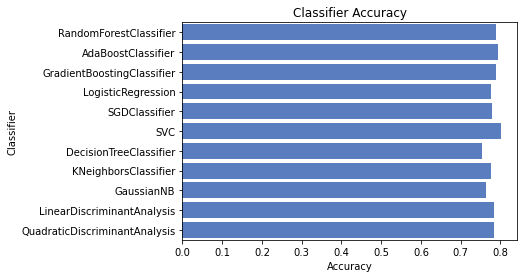

In [62]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color='b')

In [63]:
log

,Classifier,Accuracy
0,RandomForestClassifier,0.788889
0,AdaBoostClassifier,0.794444
0,GradientBoostingClassifier,0.788333
0,LogisticRegression,0.775556
0,SGDClassifier,0.777778
0,SVC,0.802222
0,DecisionTreeClassifier,0.753889
0,KNeighborsClassifier,0.776667
0,GaussianNB,0.763889
0,LinearDiscriminantAnalysis,0.784444


So the information from this test is that SVC is the best model with an accuracy of __0.802222__

#### Now prepare data to submission

Steps to do:
1. Update Index
2. Solve lost data and remove Cabin column
3. Remove Name and Ticket features
4. Encode categorical classes
5. Remove columns of C3 and EQ_S
6. Normalize Age and Fare
7. Apply PCA
8. Predict result and sabe submission file

##### Update index

In [64]:
if test.PassengerId.is_unique:
    test.set_index('PassengerId', inplace=True)
    print("Index updated")

Index updated


In [65]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### Solve lost data

In [66]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


We need to solve lost data in Age and in Fare.

In Age we shall use same strategy as in training data. We shall use substitution data according with train data.

In [67]:
test.loc[test.Age.isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S


In [68]:
test_temp1 = test.loc[(test.Pclass == 1) & (test.Age.isna())].fillna(Pclass_age[1])
test_temp2 = test.loc[(test.Pclass == 2) & (test.Age.isna())].fillna(Pclass_age[2])
test_temp3 = test.loc[(test.Pclass == 3) & (test.Age.isna())].fillna(Pclass_age[3])

In [69]:
test.loc[test_temp1.index, :] = test_temp1[:]
test.loc[test_temp2.index, :] = test_temp2[:]
test.loc[test_temp3.index, :] = test_temp3[:]

In [70]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,417.000000
mean,2.265550,29.321770,0.447368,0.392344,35.627188
std,0.841838,12.904065,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,25.000000,0.000000,0.000000,14.454200
75%,3.000000,36.375000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In Fare we shall use the correlation between Fare and class.

In [71]:
test.loc[test.Fare.isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [72]:
test.corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.521341,0.001087,0.018721,-0.577147
Age,-0.521341,1.000000,-0.076124,-0.052613,0.354952
SibSp,0.001087,-0.076124,1.000000,0.306895,0.171539
Parch,0.018721,-0.052613,0.306895,1.000000,0.230046
Fare,-0.577147,0.354952,0.171539,0.230046,1.000000


We keep seen a high correlation between Fare and Pclass. So we could substitude the Fare value with the median of class 3.

In [73]:
med_fare =test.groupby(by=test.Pclass).Fare.median()[int(test.loc[test.Fare.isna()].Pclass.values)]
ind_fare = int(test.loc[test.Fare.isna()].index.values)

In [74]:
med_fare

7.8958

In [75]:
ind_fare

1044

In [76]:
test.at[ind_fare, 'Fare'] = med_fare
test.loc[ind_fare]

Pclass                       3
Name        Storey, Mr. Thomas
Sex                       male
Age                       60.5
SibSp                        0
Parch                        0
Ticket                    3701
Fare                    7.8958
Cabin                      NaN
Embarked                     S
Name: 1044, dtype: object

Remove Cabin column

In [77]:
test.drop(labels='Cabin',axis=1, inplace=True, errors='ignore')

##### Remove Name and Ticket features

In [78]:
test = test.drop(['Name', 'Ticket'], axis=1, errors='ignore')
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


##### Transform Pclass, Sex and Embarked in different columns for each category.

In [79]:
test_col = test.columns
list_col = ['Pclass', 'Sex', 'Embarked']
if(all(x in test_col for x in list_col)):
    test = pd.get_dummies(test, columns=['Pclass', 'Sex', 'Embarked'])
test

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
892,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
893,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
894,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
895,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
896,22.0,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,24.0,0,0,8.0500,0,0,1,0,1,0,0,1
1306,39.0,0,0,108.9000,1,0,0,1,0,1,0,0
1307,38.5,0,0,7.2500,0,0,1,0,1,0,0,1


In [80]:
test.rename(columns={'Pclass_1': 'C1', 'Pclass_2' : 'C2', 'Pclass_3': 'C3',
            'Sex_female' : 'female', 'Sex_male' : 'male',
            'Embarked_C' : 'E_C', 'Embarked_Q' : 'E_Q', 'Embarked_S' : 'E_S'},
           inplace=True)
test

,Age,SibSp,Parch,Fare,C1,C2,C3,female,male,E_C,E_Q,E_S
PassengerId,,,,,,,,,,,,
892,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
893,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
894,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
895,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
896,22.0,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,24.0,0,0,8.0500,0,0,1,0,1,0,0,1
1306,39.0,0,0,108.9000,1,0,0,1,0,1,0,0
1307,38.5,0,0,7.2500,0,0,1,0,1,0,0,1


In [81]:
test_copy = test.copy()

##### Remove columns of C3 and EQ_S

In [82]:
test = test.drop(['C3', 'male', 'E_S'], axis=1, errors='ignore')
test.head()

,Age,SibSp,Parch,Fare,C1,C2,female,E_C,E_Q
PassengerId,,,,,,,,,
892,34.5,0,0,7.8292,0,0,0,0,1
893,47.0,1,0,7.0000,0,0,1,0,0
894,62.0,0,0,9.6875,0,1,0,0,1
895,27.0,0,0,8.6625,0,0,0,0,0
896,22.0,1,1,12.2875,0,0,1,0,0


In [83]:
# Transform in this case to use the training model of train data
test[['Age','SibSp', 'Fare']] = scaler.transform(test[['Age','SibSp', 'Fare']])
test.head()

,Age,SibSp,Parch,Fare,C1,C2,female,E_C,E_Q
PassengerId,,,,,,,,,
892,0.428248,0.000,0,0.015282,0,0,0,0,1
893,0.585323,0.125,0,0.013663,0,0,1,0,0
894,0.773813,0.000,0,0.018909,0,1,0,0,1
895,0.334004,0.000,0,0.016908,0,0,0,0,0
896,0.271174,0.125,1,0.023984,0,0,1,0,0


In [84]:
test.describe()

,Age,SibSp,Parch,Fare,C1,C2,female,E_C,E_Q
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363179,0.055921,0.392344,0.069410,0.255981,0.222488,0.363636,0.244019,0.110048
std,0.162152,0.112095,0.981429,0.109026,0.436934,0.416416,0.481622,0.430019,0.313324
min,-0.003141,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.283740,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.308872,0.000000,0.000000,0.028213,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.451809,0.125000,0.000000,0.061429,1.000000,0.000000,1.000000,0.000000,0.000000
max,0.949736,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
test.Parch = test.Parch / test.Parch.max()
test.describe()

,Age,SibSp,Parch,Fare,C1,C2,female,E_C,E_Q
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363179,0.055921,0.043594,0.069410,0.255981,0.222488,0.363636,0.244019,0.110048
std,0.162152,0.112095,0.109048,0.109026,0.436934,0.416416,0.481622,0.430019,0.313324
min,-0.003141,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.283740,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.308872,0.000000,0.000000,0.028213,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.451809,0.125000,0.000000,0.061429,1.000000,0.000000,1.000000,0.000000,0.000000
max,0.949736,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Apply PCA

In [86]:
# Model trained with train data
test_red = pca.transform(test)
test_red

array([[-0.38507092, -0.2497097 , -0.53511362,  0.17321301,  0.75897404,
        -0.06126267],
       [ 0.12096264,  0.54598905, -0.36160146,  0.02935905, -0.25436467,
        -0.27010076],
       [-0.71982766,  0.12184695,  0.23584791, -0.16960729,  1.06766251,
        -0.20307469],
       ...,
       [-0.32184088, -0.31901622, -0.17019535,  0.03316395, -0.15019701,
        -0.1780832 ],
       [-0.33452903, -0.30743913, -0.18525718,  0.06580619, -0.16919523,
        -0.04710996],
       [ 0.12868517, -0.41151512,  0.31072561,  0.77619319, -0.05438529,
         0.04912491]])

### Apply SVM to obtain the predictions to be submmited

Train the model with the hole train dataset.

In [87]:
svm_clf.fit(train_red,train_lab)

/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [88]:
y_pred = svm_clf.predict(test_red)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [89]:
y_pred = pd.DataFrame(data={'PassengerId' : test.index, 'Survived' : y_pred})
y_pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [90]:
y_pred = y_pred.set_index('PassengerId')
y_pred.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [91]:
# Prepare submission file
output = y_pred
output.to_csv('submission.csv', index=True)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Submission reached a Public Score of:
### 0.77751

So we have to plan how to improve this score. First of all we shall use the all columns before PCA  to check if anything changes

#### Prepare data from initial copy

In [92]:
# Transform in this case to use the training model of train data
train_feat = train_copy.copy()
train_feat[['Age','SibSp', 'Fare']] = scaler.fit_transform(train_copy[['Age','SibSp', 'Fare']])
train_feat.Parch = train_feat.Parch / test_copy.Parch.max()
train_feat.head()

,Age,SibSp,Parch,Fare,C1,C2,C3,female,male,E_C,E_Q,E_S
PassengerId,,,,,,,,,,,,
1,0.271174,0.125,0.0,0.014151,0,0,1,0,1,0,0,1
2,0.472229,0.125,0.0,0.139136,1,0,0,1,0,1,0,0
3,0.321438,0.000,0.0,0.015469,0,0,1,1,0,0,0,1
4,0.434531,0.125,0.0,0.103644,1,0,0,1,0,0,0,1
5,0.434531,0.000,0.0,0.015713,0,0,1,0,1,0,0,1


In [93]:
# Transform in this case to use the training model of train data
test = test_copy.copy()
test[['Age','SibSp', 'Fare']] = scaler.fit_transform(test[['Age','SibSp', 'Fare']])
test.Parch = test.Parch / test_copy.Parch.max()
test.head()

,Age,SibSp,Parch,Fare,C1,C2,C3,female,male,E_C,E_Q,E_S
PassengerId,,,,,,,,,,,,
892,0.452723,0.000,0.000000,0.015282,0,0,1,0,1,0,1,0
893,0.617566,0.125,0.000000,0.013663,0,0,1,1,0,0,0,1
894,0.815377,0.000,0.000000,0.018909,0,1,0,0,1,0,1,0
895,0.353818,0.000,0.000000,0.016908,0,0,1,0,1,0,0,1
896,0.287881,0.125,0.111111,0.023984,0,0,1,1,0,0,0,1


In [94]:
train_feat.Parch = train_feat.Parch / test_copy.Parch.max()
train_feat.describe()

,Age,SibSp,Parch,Fare,C1,C2,C3,female,male,E_C,E_Q,E_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.359970,0.065376,0.004711,0.062858,0.242424,0.206510,0.551066,0.352413,0.647587,0.190797,0.086420,0.722783
std,0.166430,0.137843,0.009951,0.096995,0.428790,0.405028,0.497665,0.477990,0.477990,0.393150,0.281141,0.447876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.271174,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.321438,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.459663,0.125000,0.000000,0.060508,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.074074,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
test.Parch = test.Parch / test_copy.Parch.max()
test.describe()

,Age,SibSp,Parch,Fare,C1,C2,C3,female,male,E_C,E_Q,E_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.384436,0.055921,0.004844,0.069410,0.255981,0.222488,0.521531,0.363636,0.636364,0.244019,0.110048,0.645933
std,0.170171,0.112095,0.012116,0.109026,0.436934,0.416416,0.500135,0.481622,0.481622,0.430019,0.313324,0.478803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.301068,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.327443,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.477450,0.125000,0.000000,0.061429,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.111111,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Apply PCA

In [96]:
# Model trained with train data
train_red = pca.fit_transform(train_feat)
train_red

array([[-0.76615727,  0.22935539, -0.05624927, -0.15886581, -0.11483298],
       [ 1.48461131, -0.28526498,  0.78731122, -0.14699894, -0.17403399],
       [ 0.41158762,  0.89356899, -0.4214711 , -0.27677147, -0.17472918],
       ...,
       [ 0.41368314,  0.89926609, -0.42312083, -0.28010056, -0.18006931],
       [ 0.298165  , -0.94268719,  1.15346387, -0.01159389, -0.11346105],
       [-0.53629671,  0.43591831,  0.72686162,  0.37330842,  0.89624577]])

In [97]:
test_red = pca.transform(test)
test_red

array([[-0.53495075,  0.42957968,  0.72749255,  0.3696898 ,  0.89988818],
       [ 0.41954502,  0.86451876, -0.42047318, -0.29879009, -0.15904609],
       [-0.08019093, -0.54713797,  0.16203524,  1.10388066,  1.06628603],
       ...,
       [-0.76152057,  0.1984216 , -0.05136129, -0.1709841 , -0.09594764],
       [-0.76601066,  0.21999742, -0.05345477, -0.15873515, -0.10840941],
       [-0.33210391,  0.17377934,  1.09914149,  0.45048859, -0.42919601]])

In [98]:
X_train = pd.DataFrame(train_red)
y_train = train_lab

In [99]:
splits = 20
sss = StratifiedShuffleSplit(n_splits=splits, test_size=0.1, random_state=0)

X = X_train
y = y_train

acc_dict = {}

for train_index, test_index in sss.split(X,y):
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_tr, y_tr)
        train_predictions = clf.predict(X_ts)
        acc = accuracy_score(y_ts, train_predictions)        
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc
            
log = log.drop(log.index, axis=0)
    
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / splits
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)
    

/tmp/ipykernel_3729/2099964966.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_tr, y_tr)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

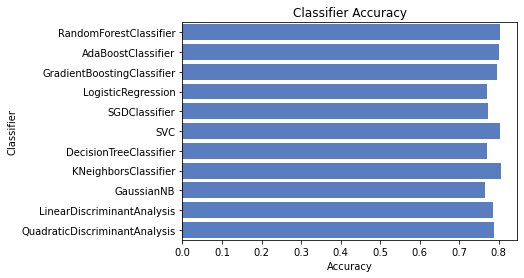

In [100]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color='b')

In [101]:
log

,Classifier,Accuracy
0,RandomForestClassifier,0.802778
0,AdaBoostClassifier,0.800000
0,GradientBoostingClassifier,0.795000
0,LogisticRegression,0.769444
0,SGDClassifier,0.773889
0,SVC,0.802222
0,DecisionTreeClassifier,0.770000
0,KNeighborsClassifier,0.806667
0,GaussianNB,0.766667
0,LinearDiscriminantAnalysis,0.785556


Now we can see the best behaviour is for the KNeighborsClassifier with an accuracy of __0.806667__.


### Apply KN  to obtain the predictions to be submmited

Train the model with the hole train dataset.

In [105]:
kn_clf.fit(train_red,train_lab)

/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [106]:
y_pred = kn_clf.predict(test_red)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [107]:
y_pred = pd.DataFrame(data={'PassengerId' : test.index, 'Survived' : y_pred})
y_pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [108]:
y_pred = y_pred.set_index('PassengerId')
y_pred.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [109]:
# Prepare submission file
output = y_pred
output.to_csv('submission.csv', index=True)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Submission reached a Public Score of:
### 0.77033

Worse value than before. So we can check with the same model with this data

### Apply SVM to obtain the predictions to be submmited

Train the model with the hole train dataset.

In [110]:
svm_clf.fit(train_red,train_lab)

/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [111]:
y_pred = svm_clf.predict(test_red)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [112]:
y_pred = pd.DataFrame(data={'PassengerId' : test.index, 'Survived' : y_pred})
y_pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [113]:
y_pred = y_pred.set_index('PassengerId')
y_pred.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [114]:
# Prepare submission file
output = y_pred
output.to_csv('submission.csv', index=True)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Submission reached a Public Score of:
### 0.77751

Same value as in the previous attemps. This seems to be obvious and we can see how reducting dependent features doesn't affect to the final solution.  